# Valor de la vivienda en los suburbios de boston

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

### Description de los datos

- crim : per capita crime rate by town.

- zn : proportion of residential land zoned for lots over 25,000 sq.ft.

- indus: proportion of non-retail business acres per town.

- chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- nox: nitrogen oxides concentration (parts per 10 million).

- rm: average number of rooms per dwelling.

- age: proportion of owner-occupied units built prior to 1940.

- dis: weighted mean of distances to five Boston employment centres.

- rad: index of accessibility to radial highways.

- tax: full-value property-tax rate per \$10,000.

- ptratio: pupil-teacher ratio by town.

- black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- lstat:lower status of the population (percent).

- medv: median value of owner-occupied homes in \$1000s.



## Getting Started

En este proyecto deberemos crear un modelo de regresion que nos permita conocer y evaluar el valor de la vivienda en los suburbios de Boston. Deberemos determinar que algoritmo de regresion se adapta mas a nuestro caso y tratar de obtener un mayor poder de precision en nuestro datos de prueba. Para ello deberemos estudiar nuestros datos y seguir una serie de pasos para obtener una mayor calidad en nuestros datos y por consiguiente en nuestro modelo de prediccion, las secciones a seguir seran las siguientes:

- Conseguir los datos
- Descubrir y visualizar los datos para obtener nuevas insights
- Preparar los datos para el los algoritmos 
- Seleccionar el modelo y entrenarlo
- Fine-tune el algoritmo
- Presentar la solución.

El dataset es originario del repositorio de [UCI Machine Learning Repository](https://www.kaggle.com/samratp/boston-housing-prices-evaluation-validation). Este conjunto de datos fueron recogidos en 1978 y cuenta con 506 entradas y 14 caracteristicas, que representan una muestra de las viviendas de los suburbios de Boston.





https://www.kaggle.com/samratp/boston-housing-prices-evaluation-validation

In [2]:
#Import librarires 

import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston


In [3]:
# Load Housing dataset
raw_data =load_boston()


In [4]:
X = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
y = pd.DataFrame(raw_data.target, columns=['MEDV'])
df = pd.concat([X,y], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Nos encontramos ante un dataset donde todos sus variable serían numericas y no habria ningun dato no nulo.

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Exploratory Data Analysis

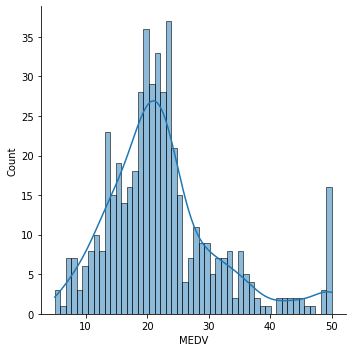

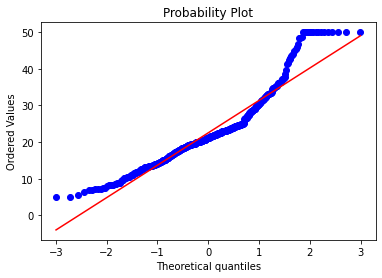

In [6]:
# Primero analizaremos la distribucion de la variable objetivo MEDV, para ello deberemos usar la funcion displot de la libreria seaborn.
from scipy import stats
sns.displot(df.MEDV, bins=50, kde=True)
fig = plt.figure()
res = stats.probplot(df.MEDV, plot=plt)

In [7]:
print(stats.kurtosis(df.MEDV))
print(stats.skew(df.MEDV))

1.4686287722747462
1.104810822864635


En los datos de la descripción original nos informan que la variable MEDV esta acotada a 50000$, es por ello que podemos observar en el histograma un aumento de casos en ese valor. Basandonos en esa informacion las casa con valores superiores a ese precio no nos pueden ayudar a predecir el MEDV, por lo que deberemos solucionar ese problema antes de entrenar a nuestro modelo. Ademas la variable presenta una asimetrica positiva que puede ser solucionada haciendo una transformacion logaritmica o una estandarizacion de los datos.


<AxesSubplot:>

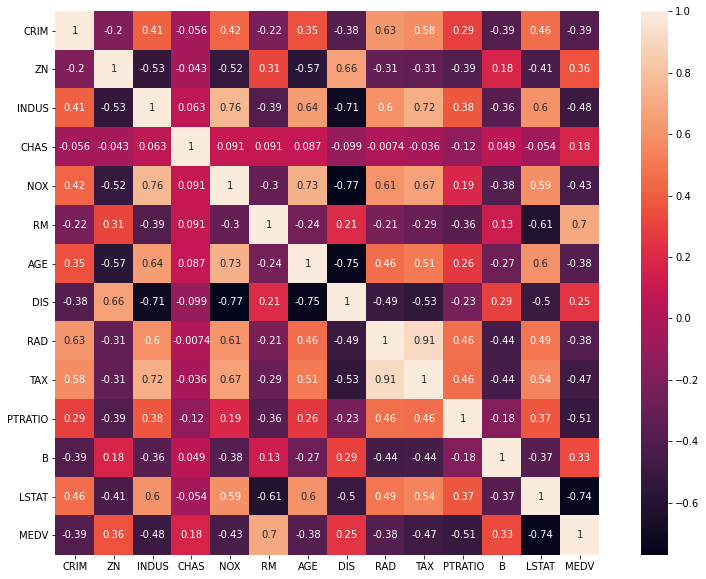

In [8]:
corr = df.corr(method='pearson')
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, square=True, annot=True)

Observanlo la matriz de correlación podemos ver que variables como LSTAT, PTRATIO, TAX, RM, NOX, INDUS tienen un buena correlacion con nuestro output MEDV. Estas variables deberan ser consideradas a la hora de optimizar nuestro modelo.
Es importante seleccionar variables para el modelo de regresion las cuales no tenga Multicolinealidad entre ellas ya que introduciriamos fallos en nuestro modelo. La variables RAD y TAX tienen un correlacion entre ellas del 0.91, por lo que no deberemos seleccionar ambas variables para entrenar a nuestro modelo. Al igual que la variable DIS que obtiene una alta correlacion con variables como NOX o AGE.

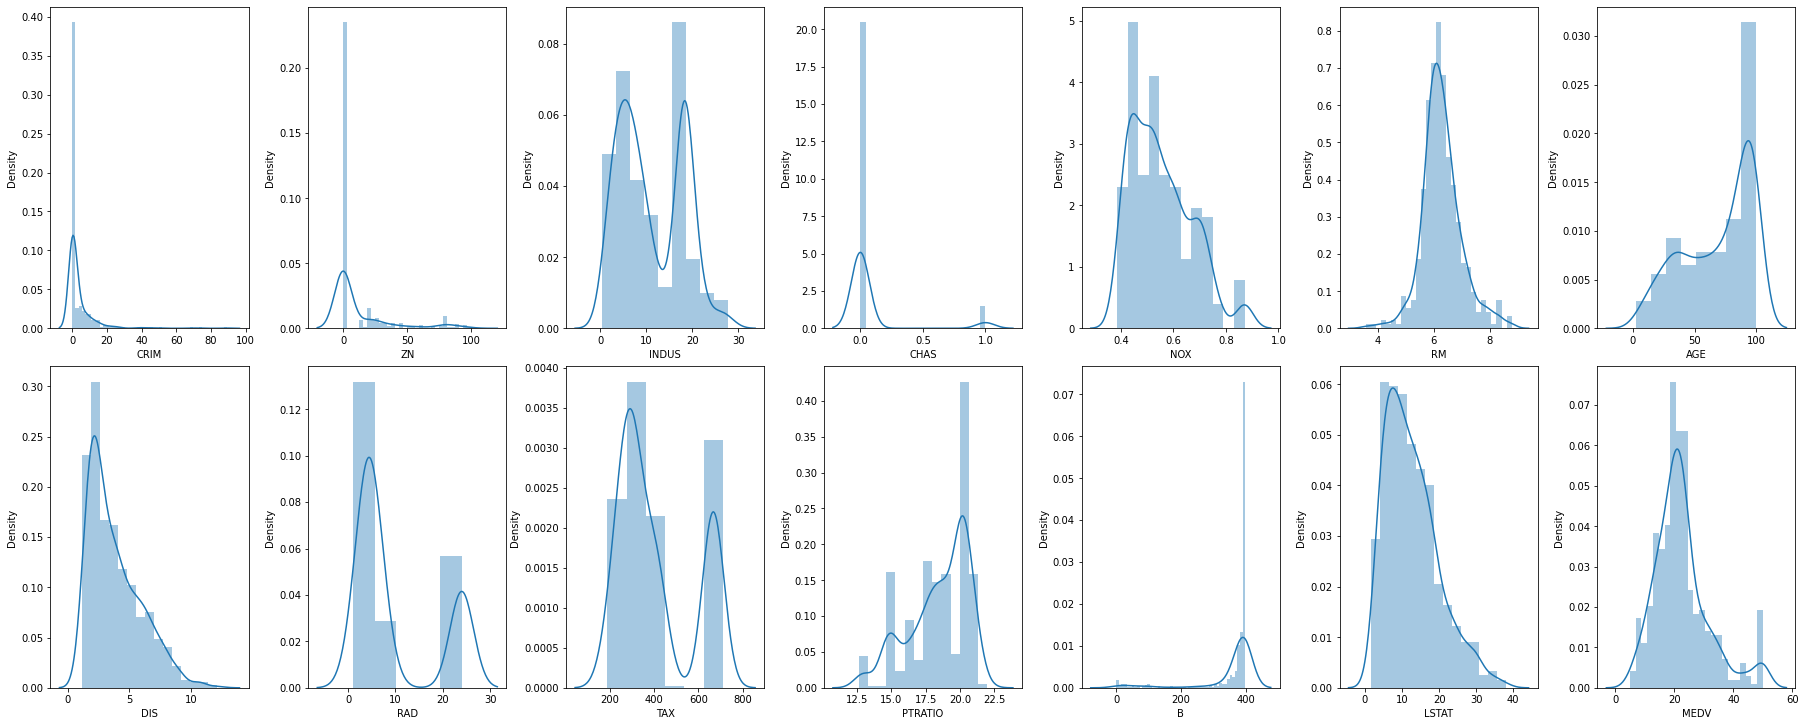

In [9]:
# Desidad de las variables
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(25, 10))
index = 0
axs = axs.flatten()
for i,col in df.items():
    sns.distplot(col, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4)


- En el histograma nos muestra que columnas como CRIM, ZN, B tienen una alta asimetria. 
- La variable CHAS como ya suponiamos se trataria de un variable categorica la cual indicaria si la casa se encuentra cerca del rio. 
- Las demas columnas tienen una distrbucion normal o binomial.

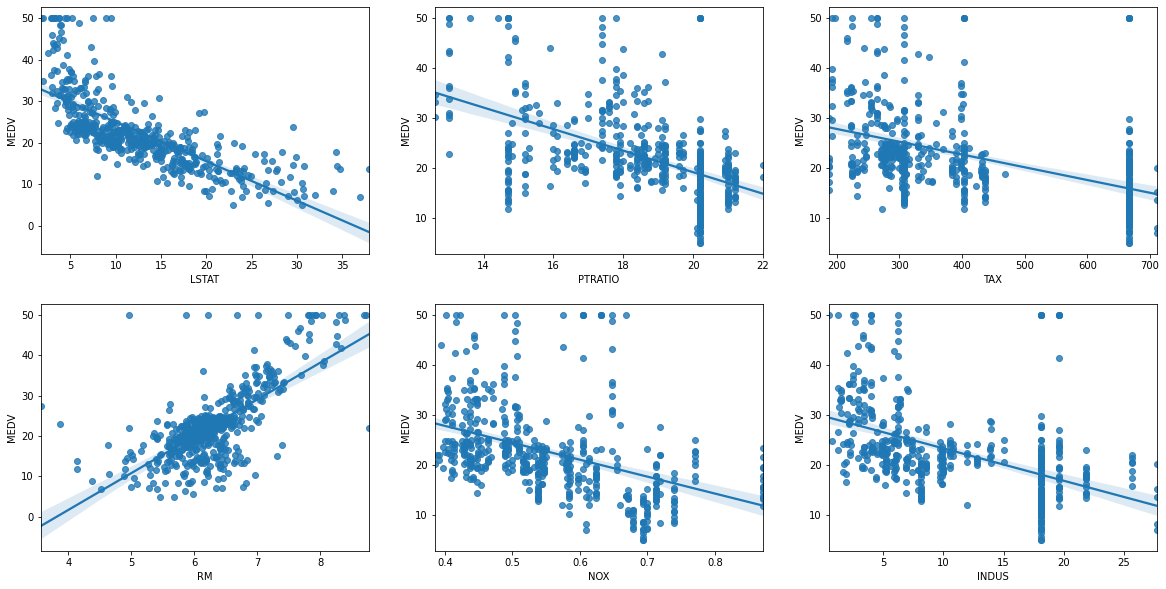

In [38]:
# Evaluaremos el comportamiento de las variables seleccionadas frente a la variable objetivo
column_sel=['LSTAT', 'PTRATIO', 'TAX', 'RM','NOX','INDUS']
X = df[column_sel]
y = df['MEDV']

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, col in enumerate(column_sel):
    sns.regplot(y=y, x=X[col], ax=axs[i])



En nuestro analisis:
- El precio de la vivienda aumenta con el incremento de RM.

- El precio desciende con el aumento de las demas variables.

## Preparacion de los datos

In [11]:
# Calcularemos el porcentaje de valores los caules tienen un valor de 50000$ o mayor en la variable MEDV, esto nos indicaría la viabilidad a la hora de tratar los datos sesgados
print("Porcentaje de valores: {:.2%}".format(df[df.MEDV >=50.0].MEDV.count()/df.MEDV.count()))

# El 3.16% de los valores superan o igualan esta marca, es por ello que borraremos los datos con este registro para obtener una mejor precision en nuestro modelo.
data = df[~(df.MEDV >=50.0)]
data.shape

Porcentaje de valores: 3.16%


(490, 14)

In [12]:
# Escalaremos las columnas elegidas para ver como se comportan frente a la variable objetivo

column_sel=['LSTAT', 'PTRATIO', 'TAX', 'RM','NOX','INDUS']
X = data[column_sel]
y = data['MEDV']


## Evaluar cada modelo

In [13]:
# Split de los datos en training y test 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [14]:
# Importamos los algoritmos del modelo
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('Tree', DecisionTreeRegressor()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('SVR', SVR()))

# Evaluamos los models

result = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=132)
    result_cv =  cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    result.append(result_cv)
    names.append(name)
    print('El modelo {0} a obtenido un scoring medio de {1:.4f} ({2:.4f})'.format(name,result_cv.mean(),result_cv.std()))
    print('')


El modelo LR a obtenido un scoring medio de -18.0705 (2.1468)

El modelo LASSO a obtenido un scoring medio de -21.5374 (5.4294)

El modelo Tree a obtenido un scoring medio de -16.6772 (4.0203)

El modelo KNN a obtenido un scoring medio de -16.9121 (2.2503)

El modelo SVR a obtenido un scoring medio de -43.1049 (7.1461)



Segun los resuntados arrojados el modelo de Tree seria adecado para entrenar nuestro modelo ya que ha obtenido un error medio cuadratico menor con 16.677. Repetiremos este proceso pero esta vez escalado las variblas features para intentar obtener una mejor adaptacion del modelo.
 

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)

# Evaluacion del modelo
result = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=132)
    result_cv =  cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='neg_mean_squared_error')
    result.append(result_cv)
    names.append(name)
    print('El modelo {0} a obtenido un scoring medio de {1:.4f} ({2:.4f})'.format(name,result_cv.mean(),result_cv.std()))
    print('')

El modelo LR a obtenido un scoring medio de -18.0705 (2.1468)

El modelo LASSO a obtenido un scoring medio de -20.0552 (4.1484)

El modelo Tree a obtenido un scoring medio de -16.0937 (4.5793)

El modelo KNN a obtenido un scoring medio de -11.6769 (1.4628)

El modelo SVR a obtenido un scoring medio de -14.2179 (4.7432)



Observamos que el procedimiento de escalar nuestros datos nos ha permtido obtener mejores resultados en nuestro algoritmo de KNR con un error de -11.67. Es por ello que elegiremos este algoritmo para entrenarlo y ajustarlo tratando de mejorar sus resultados

## Ajustar el modelo

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(n_neighbors = list(range(1,30)))
model = KNeighborsRegressor()
kfold = KFold(n_splits=5, random_state=132)
grid = GridSearchCV(model, param_grid, cv=kfold, scoring='neg_mean_squared_error')
grid_result = grid.fit(X_train_scaled, y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print('{0:.3f} ({1:.3f}) con : {2}'.format(mean, std, param))

Best: -11.383390 using {'n_neighbors': 8}
-15.765 (1.736) con : {'n_neighbors': 1}
-12.945 (1.620) con : {'n_neighbors': 2}
-12.407 (1.390) con : {'n_neighbors': 3}
-11.848 (1.556) con : {'n_neighbors': 4}
-11.677 (1.463) con : {'n_neighbors': 5}
-11.619 (1.342) con : {'n_neighbors': 6}
-11.494 (1.151) con : {'n_neighbors': 7}
-11.383 (1.492) con : {'n_neighbors': 8}
-11.418 (1.562) con : {'n_neighbors': 9}
-11.670 (1.596) con : {'n_neighbors': 10}
-11.752 (1.736) con : {'n_neighbors': 11}
-11.946 (1.845) con : {'n_neighbors': 12}
-12.266 (1.977) con : {'n_neighbors': 13}
-12.343 (1.878) con : {'n_neighbors': 14}
-12.200 (1.868) con : {'n_neighbors': 15}
-12.287 (1.792) con : {'n_neighbors': 16}
-12.423 (1.882) con : {'n_neighbors': 17}
-12.621 (1.801) con : {'n_neighbors': 18}
-12.823 (1.870) con : {'n_neighbors': 19}
-12.792 (1.813) con : {'n_neighbors': 20}
-12.940 (1.737) con : {'n_neighbors': 21}
-13.046 (1.763) con : {'n_neighbors': 22}
-13.171 (1.822) con : {'n_neighbors': 23}
-

## Hacer predicciones y evaluar el modelo

In [42]:
# Preparar el modelo

final_model = KNeighborsRegressor(n_neighbors=8)
final_model.fit(X_train_scaled, y_train)

# Escalamos el set X_test y hacemos predicciones

X_test_scaled = scaler.transform(X_test)
predictions = final_model.predict(X_test_scaled)

print('Error cuadratido medio:', mean_squared_error(y_test, predictions))
print('R^2:', r2_score(y_test, predictions))

Error cuadratido medio: 11.522817283163265
R^2: 0.8133984561698532


In [44]:
# Save model and scaler
from pickle import dump

dump(final_model, open('model.pkl','wb'))
dump(scaler,open('scaler.pkl','wb'))